# 约定

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

前面通过使用`plt.subplot()`可以绘制子图，接下来讲解更高级的创建控制方法。
# 1. 创建子图
## 1.通过subplots()创建子图：
`plt.subplots(ncols=3, nrows=2)`会创建一个$3\times2$的图表

其中返回创建的figure和子图数组通过数组unpack来获取，如下面所示：

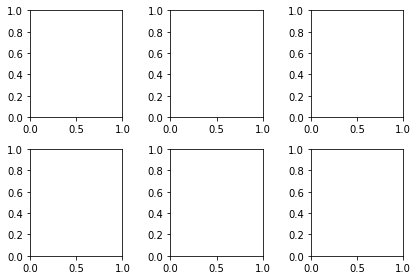

In [5]:
# 返回参数第一个为figure，第二个axes（子图）的数组
fig1, f1_axes = plt.subplots(ncols=3, nrows=2)
fig1.tight_layout()

## 2. 通过GridSpec()创建子图：
GridSpec()创建子图步骤更多，而且需要手动一个个添加子图。
但是却能更好的控制子图的样式，创建步骤为：
1. 通过`plt.figure()`创建个figure对象
2. 调用`gridspec.GridSpec(ncols=3, nrows=2)`生成$3\times2$的子图生成对象
3. 使用GridSpec生成的对象生成一个子图
3. 通过figure对象的`add_subplot()`将生成的子图添加到图内
4. 最后用figre的`tight_layout()`方法来自动调整子图位置

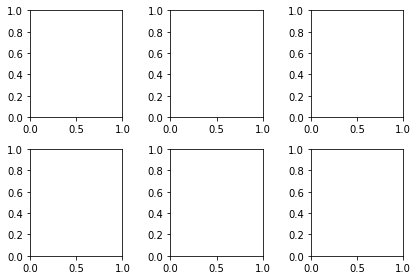

In [6]:
fig2 = plt.figure()
spec2 = gridspec.GridSpec(ncols=3, nrows=2)

# 注意这里用法：spec2[m,n]。意思是生成一个在m行n列的子图
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[0, 2])
f2_ax4 = fig2.add_subplot(spec2[1, 0])
f2_ax5 = fig2.add_subplot(spec2[1, 1])
f2_ax6 = fig2.add_subplot(spec2[1, 2])
fig2.tight_layout()

### 2.1 通过GridSpec()创建大小不规则的子图

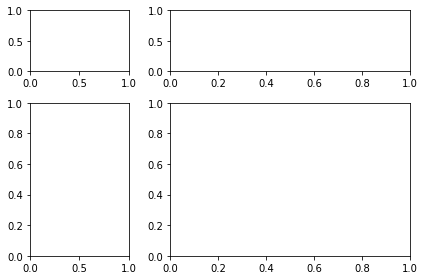

In [7]:
fig3 = plt.figure()
spec3 = gridspec.GridSpec(ncols=3, nrows=3)


fig3.add_subplot(spec3[0, 0])

# 注意这用法，spec3[0,1:]意思是生成y轴上范围从1到最后的子图
fig3.add_subplot(spec3[0, 1:])
# 注意这用法，spec3[0,1:]意思是生成x轴上范围从1到最后的子图
fig3.add_subplot(spec3[1:, 0])
fig3.add_subplot(spec3[1:, 1:])

fig3.tight_layout()

### 2.2 添加注释方面
`add_subplot()`返回一个axes对象，可以直接接在后面调用设置方法如：
```python
fig3.add_subplot(spec3[0, 0]).annotate('GridSpec[0, 0]', **anno_opts)
```

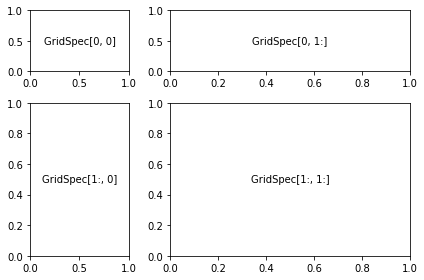

In [8]:
fig3 = plt.figure()
spec3 = gridspec.GridSpec(ncols=3, nrows=3)
anno_opts = dict(xy=(0.5, 0.5), xycoords='axes fraction',
                 va='center', ha='center')

fig3.add_subplot(spec3[0, 0]).annotate('GridSpec[0, 0]', **anno_opts)
fig3.add_subplot(spec3[0, 1:]).annotate('GridSpec[0, 1:]', **anno_opts)
fig3.add_subplot(spec3[1:, 0]).annotate('GridSpec[1:, 0]', **anno_opts)
fig3.add_subplot(spec3[1:, 1:]).annotate('GridSpec[1:, 1:]', **anno_opts)

fig3.tight_layout()

### 2.2 使用width_ratios和height_ratios批量指定格子尺寸
上面的方法指定格子大小还是太麻烦了，如果使用height_ratios和width_ratios来指定的话会很简单
ratios就是一个list，他储存了每个子图要占据多少宽度，和高度，如
```
widths = [2, 3, 1.5]
heights = [1, 3, 2]
```
就是意思图按照 2 3 1.5的宽度切片

然后按照 1 3 2的高度切片
把这两个参数在生成GirdSpec对象时传入，就行。
当add_subplot时只需要传入要add哪行哪列入spec4[1,2]就行，不用手动指定宽度了

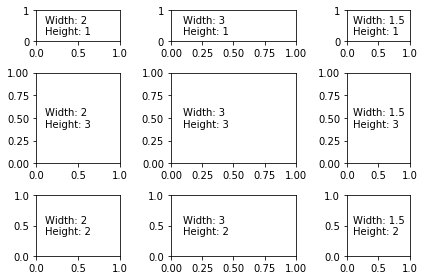

In [9]:
fig4 = plt.figure()
widths = [2, 3, 1.5]
heights = [1, 3, 2]
spec4 = gridspec.GridSpec(ncols=3, nrows=3, width_ratios=widths,
                          height_ratios=heights)
for row in range(3):
    for col in range(3):
        ax = fig4.add_subplot(spec4[row, col])
        label = 'Width: {}\nHeight: {}'.format(widths[col], heights[row])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

fig4.tight_layout()

# 3.subplots()使用width_ratios和height_ratios批量指定格子尺寸
subplots()也可以使用width_ratios和height_ratios，在用subplots()生成子图时指定gridspec_kw参数，传入信息就行

但是注意，应该传入形如：
```pytohn
{width_ratios=[1,2,3],height_ratios=[2,2,3]
```
的字典

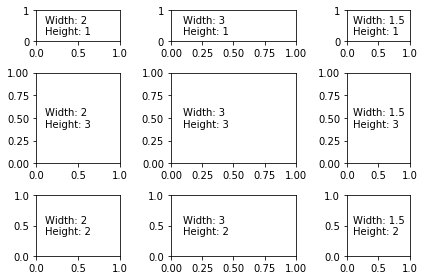

In [10]:
# 构建字典
gs_kw = dict(width_ratios=widths, height_ratios=heights)
# 这里指定了gridspec_kw
fig5, f5_axes = plt.subplots(ncols=3, nrows=3, gridspec_kw=gs_kw)


for r, row in enumerate(f5_axes):
    for c, ax in enumerate(row):
        label = 'Width: {}\nHeight: {}'.format(widths[c], heights[r])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

fig5.tight_layout()

# 4 优化子图间距离
用GridSpec生成子图模板时，可以指定子图间的距离之类的信息，如：
* left right top bottom 左右上下坐标，这个主要是用来一个figure添加多个不同的GridSpec从而指定每个GridSpec的位置
* wspace hsspace 图表间的水平和垂直距离

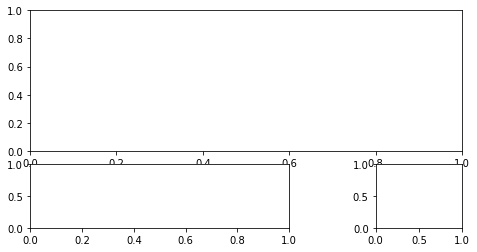

In [11]:
fig = plt.figure()
gs1 = gridspec.GridSpec(nrows=3, ncols=3,left=0, right=1, wspace=1,hspace=0.2)
ax1 = fig.add_subplot(gs1[:-1, :])
ax2 = fig.add_subplot(gs1[-1, :-1])
ax3 = fig.add_subplot(gs1[-1, -1])

一个生成多个GridSpec，使用left right绘制在同一个figure不同区域的例子

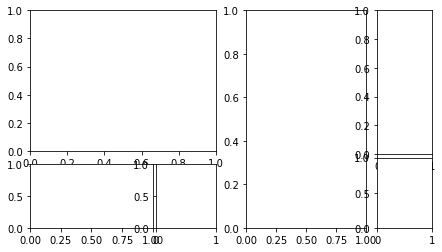

In [12]:
fig = plt.figure()
# 这个GridSpec绘制在左0.05 右0.48范围
gs1 = gridspec.GridSpec(nrows=3, ncols=3, left=0.05, right=0.48,
                        wspace=0.05)
ax1 = fig.add_subplot(gs1[:-1, :])
ax2 = fig.add_subplot(gs1[-1, :-1])
ax3 = fig.add_subplot(gs1[-1, -1])

# 这个GridSpec绘制在左0.55 右0.98范围内
gs2 = gridspec.GridSpec(nrows=3, ncols=3, left=0.55, right=0.98,
                        hspace=0.05)
ax4 = fig.add_subplot(gs2[:, :-1])
ax5 = fig.add_subplot(gs2[:-1, -1])
ax6 = fig.add_subplot(gs2[-1, -1])

# 5. 组图位置调整
子图生成后，可能会出现图表内容重叠或者超出figure的情况，如：

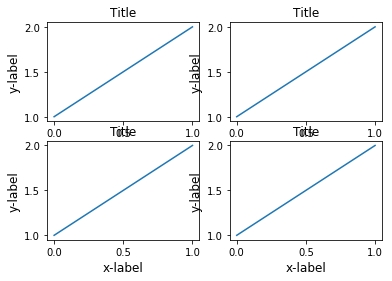

In [13]:

plt.rcParams['savefig.facecolor'] = "0.8"


def example_plot(ax, fontsize=12):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

通过调用plt.tight_layout()方法可以自动调整

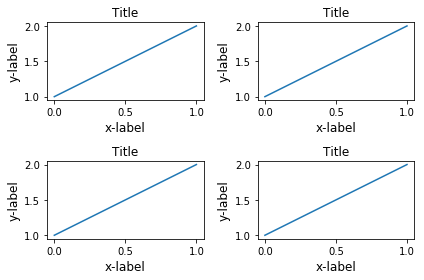

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
plt.tight_layout()

plt.tight_layout()还可以传入参数，如：

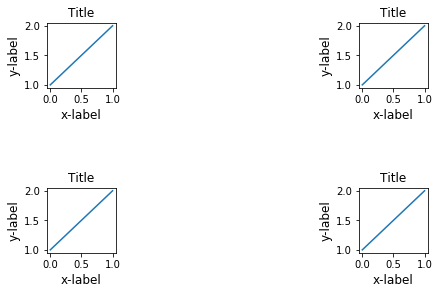

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
plt.tight_layout(pad=0.4, w_pad=20, h_pad=5)